# Load Data

In [2]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1]:
!curl -O https://storage.googleapis.com/cancer_detection_2022/level1.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1720M  100 1720M    0     0  18.9M      0  0:01:30  0:01:30 --:--:-- 20.1M


In [5]:
!unzip level1.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/slides_level1/window_69_101_neg.jpg  
  inflating: content/slides_level1/window_151091_pos.jpg  
  inflating: content/slides_level1/window_1378_101_pos.jpg  
  inflating: content/slides_level1/window_1428_101_neg.jpg  
  inflating: content/slides_level1/window_1706_101_neg.jpg  
  inflating: content/slides_level1/window_327091_pos.jpg  
  inflating: content/slides_level1/window_1758_101_neg.jpg  
  inflating: content/slides_level1/window_234_094_neg.jpg  
  inflating: content/slides_level1/window_952_101_pos.jpg  
  inflating: content/slides_level1/window_389_101_pos.jpg  
  inflating: content/slides_level1/window_248_101_neg.jpg  
  inflating: content/slides_level1/window_1066_101_neg.jpg  
  inflating: content/slides_level1/window_1097_101_neg.jpg  
  inflating: content/slides_level1/window_1082_101_pos.jpg  
  inflating: content/slides_level1/window_1183_101_neg.jpg  
  inflating: content/slides_level1/window_10

In [8]:
import os
 
# Get the list of all files and directories
path = "./content/slides_level1"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# # prints all files
# print(dir_list)

Files and directories in ' ./content/slides_level1 ' :


In [9]:
def display_windows(images, row, col, x, y):
  fig = plt.figure(figsize=(x,y))
  shuffle = np.arange(len(images))
  np.random.shuffle(shuffle)
  for i in range(row):
    for j in range(col):
      idx = i*row+j
      ax = fig.add_subplot(col, row, idx+1)
      plt.imshow(images[shuffle[idx]])
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)

In [10]:
#pos & neg 
# load level 5 data
pos_images = []
neg_images = []


for file_name in dir_list:
    if file_name[-5] == 'g':
        file_path = os.path.join(path, file_name)
        neg_images.append(np.load(file_path))
    else:
        file_path = os.path.join(path, file_name)
        pos_images.append(np.load(file_path))
        


In [11]:
pos_images[0].shape

(299, 299, 3)

In [12]:
print(len(pos_images))
print(len(neg_images))

3863
3863


In [13]:
pos_images = np.array(pos_images)
neg_images = np.array(neg_images)

In [14]:
pos_images.shape

(3863, 299, 299, 3)

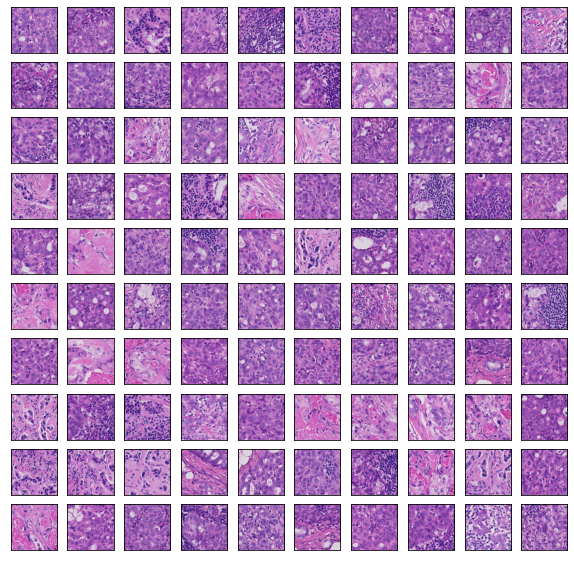

In [15]:
display_windows(pos_images, 10, 10, 10, 10)

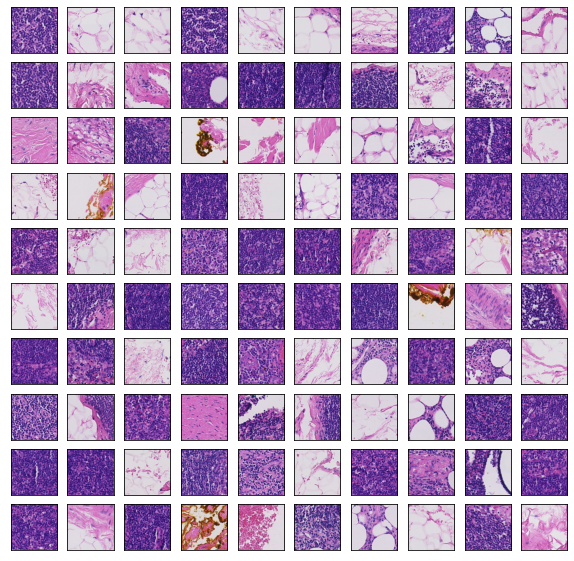

In [16]:
display_windows(neg_images, 10, 10, 10, 10)

In [17]:
#shuffle pos & neg images
label_pos = np.ones(len(pos_images))
label_neg = np.zeros(len(neg_images))
assert len(pos_images)==len(neg_images)



In [18]:
label_pos.shape

(3863,)

In [19]:
images = np.concatenate((pos_images, neg_images), axis=0)
labels = np.concatenate((label_pos, label_neg))

In [20]:
images.shape

(7726, 299, 299, 3)

In [21]:

shuffle = np.arange(len(labels))
np.random.shuffle(shuffle)

ds_images = np.array([images[i] for i in shuffle])
ds_labels = np.array([labels[i] for i in shuffle])

In [22]:
ds_images.shape

(7726, 299, 299, 3)

In [23]:
type(ds_images)

numpy.ndarray

# 8:2 Train & Test Split & save to npy file

In [ ]:
# # train test split 80:20
# train_window = np.array(ds_images[:len(ds_labels)//10*8])
# train_label = np.array(ds_labels[:len(ds_labels)//10*8])

# test_window = np.array(ds_images[len(ds_labels)//10*8:])
# test_label = np.array(ds_labels[len(ds_labels)//10*8:])

In [24]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(ds_images), np.array(ds_labels), test_size=0.2)

In [25]:
X_train.shape

(6180, 299, 299, 3)

In [26]:
with open('train.npy', 'wb') as f:
    np.save(f, X_train)
    np.save(f, y_train)

In [27]:
with open('test.npy', 'wb') as f:
    np.save(f, X_test)
    np.save(f, y_test)

##check whether the npy works or not....

In [28]:
!ls -lh

total 5.3G
drwxr-xr-x 3 root root 4.0K Dec 19 20:58 content
-rw-r--r-- 1 root root 1.7G Dec 19 20:58 level1.zip
drwxr-xr-x 2 root root 4.0K Dec 19 21:40 __pycache__
drwxr-xr-x 1 root root 4.0K Dec 16 21:15 sample_data
-rw-r--r-- 1 root root 396M Dec 19 21:58 test.npy
-rw-r--r-- 1 root root 1.6G Dec 19 21:58 train.npy
-rw-r--r-- 1 root root  50M Dec 19 21:27 tumor_078_mask.tif
-rw-r--r-- 1 root root 1.6G Dec 19 21:27 tumor_078.tif
-rw-r--r-- 1 root root 3.6K Dec 19 21:43 utils.py


In [5]:
with open('test.npy', 'rb') as f:
    X_te = np.load(f)
    y_te = np.load(f)

In [6]:
with open('train.npy', 'rb') as f:
    X_tra = np.load(f)
    y_tra = np.load(f)

ValueError: ignored

In [32]:
X_te.shape

(1546, 299, 299, 3)

In [29]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [30]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

In [31]:
len(train_ds)

97

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
test_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [37]:
del train_ds

In [34]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(299, 299, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [36]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=15
)

Epoch 1/15
97/97 [==============================] - 12s 32ms/step - loss: 0.4986 - accuracy: 0.8194 - val_loss: 0.2001 - val_accuracy: 0.9217
Epoch 2/15
97/97 [==============================] - 2s 24ms/step - loss: 0.2071 - accuracy: 0.9217 - val_loss: 0.1849 - val_accuracy: 0.9327
Epoch 3/15
97/97 [==============================] - 2s 24ms/step - loss: 0.1868 - accuracy: 0.9314 - val_loss: 0.1805 - val_accuracy: 0.9340
Epoch 4/15
97/97 [==============================] - 2s 24ms/step - loss: 0.1730 - accuracy: 0.9353 - val_loss: 0.2025 - val_accuracy: 0.9198
Epoch 5/15
97/97 [==============================] - 2s 24ms/step - loss: 0.1449 - accuracy: 0.9495 - val_loss: 0.3263 - val_accuracy: 0.8784
Epoch 6/15
97/97 [==============================] - 2s 24ms/step - loss: 0.1437 - accuracy: 0.9468 - val_loss: 0.2791 - val_accuracy: 0.8868
Epoch 7/15
97/97 [==============================] - 2s 24ms/step - loss: 0.1445 - accuracy: 0.9489 - val_loss: 0.2143 - val_accuracy: 0.9179
Epoch 8/15
9

In [39]:
model.save_weights('./checkpoints/ckpt_cus')

## Optional: load model and rerun 


In [4]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(299, 299, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [5]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [6]:
model.load_weights('./checkpoints/ckpt_cus')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
slide_path = 'tumor_078.tif' # only this file is available
tumor_mask_path = 'tumor_078_mask.tif' # only this file is available

slide_url = 'https://storage.googleapis.com/cancer_detection_2022/%s' % slide_path
mask_url = 'https://storage.googleapis.com/cancer_detection_2022/%s' % tumor_mask_path

# Download the whole slide image
if not os.path.exists(slide_path):
  !curl -O $slide_url

# Download the tumor mask
if not os.path.exists(tumor_mask_path):
  !curl -O $mask_url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1626M  100 1626M    0     0  16.7M      0  0:01:37  0:01:37 --:--:-- 19.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49.7M  100 49.7M    0     0  15.7M      0  0:00:03  0:00:03 --:--:-- 15.7M


In [40]:
slide_path = 'tumor_078.tif' # only this file is available
tumor_mask_path = 'tumor_078_mask.tif' # only this file is available
slide = open_slide(slide_path)
print ("Read WSI from %s with width: %d, height: %d" % (slide_path, 
                                                        slide.level_dimensions[0][0], 
                                                        slide.level_dimensions[0][1]))

tumor_mask = open_slide(tumor_mask_path)
print ("Read tumor mask from %s" % (tumor_mask_path))

print("Slide includes %d levels", len(slide.level_dimensions))
for i in range(len(slide.level_dimensions)):
    print("Level %d, dimensions: %s downsample factor %d" % (i, 
                                                             slide.level_dimensions[i], 
                                                             slide.level_downsamples[i]))
    assert tumor_mask.level_dimensions[i][0] == slide.level_dimensions[i][0]
    assert tumor_mask.level_dimensions[i][1] == slide.level_dimensions[i][1]

# Verify downsampling works as expected
width, height = slide.level_dimensions[7]
assert width * slide.level_downsamples[7] == slide.level_dimensions[0][0]
assert height * slide.level_downsamples[7] == slide.level_dimensions[0][1]

Read WSI from tumor_078.tif with width: 94208, height: 111104
Read tumor mask from tumor_078_mask.tif
Slide includes %d levels 9
Level 0, dimensions: (94208, 111104) downsample factor 1
Level 1, dimensions: (47104, 55552) downsample factor 2
Level 2, dimensions: (23552, 27776) downsample factor 4
Level 3, dimensions: (11776, 13888) downsample factor 8
Level 4, dimensions: (5888, 6944) downsample factor 16
Level 5, dimensions: (2944, 3472) downsample factor 32
Level 6, dimensions: (1472, 1736) downsample factor 64
Level 7, dimensions: (736, 868) downsample factor 128
Level 8, dimensions: (368, 434) downsample factor 256


In [41]:
from utils import *

In [42]:
slide_windows_generated, slide_windows_coord, level0_coord  = generate_raw_patch([slide_path], 1, stride = 150, window_len=299)

In [43]:
slide_windows_generated = np.array(slide_windows_generated)

In [ ]:
final_image= make_prediction(model,slide_windows_generated, slide_windows_coord, 
                             slide.level_dimensions[1][0], slide.level_dimensions[1][1])

In [ ]:
final_image.shape

In [ ]:
from PIL import Image
im = Image.fromarray(final_image)
im.save("level1_078.jpeg")

In [1]:
print("hi")

hi
